In [219]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [220]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [221]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [222]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [223]:
X = pd.DataFrame([im.histogram() for im in images])

In [224]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,1,1,3,2,1,6,4,6,14
2,0,0,0,0,0,0,0,1,1,1,...,4,12,13,18,22,15,19,20,32,57
3,0,0,0,0,0,0,0,0,0,0,...,28,24,15,17,3,0,0,0,0,0
4,43,23,30,32,33,36,42,73,64,57,...,9,4,2,3,2,6,2,3,4,8


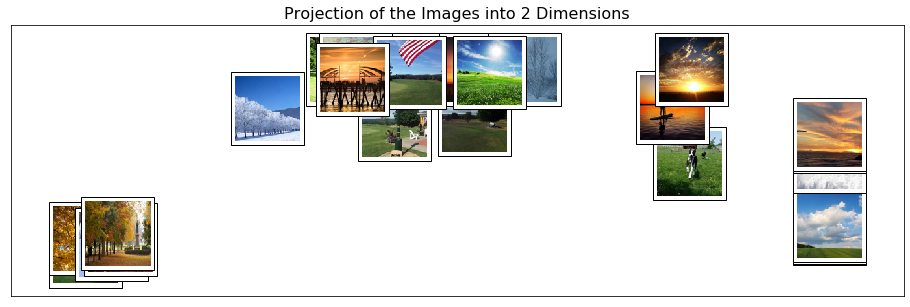

In [225]:
plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

**1.The PCA projection of the image color histograms in 2 dimensions. Using the provided
plot image space() function. This should be displayed as thumbnail images distributed
within a 2-dimensional plot.**

In [226]:
from sklearn.decomposition import PCA

In [227]:
pca = PCA(n_components=2)

In [228]:
transX = pca.fit_transform(X)

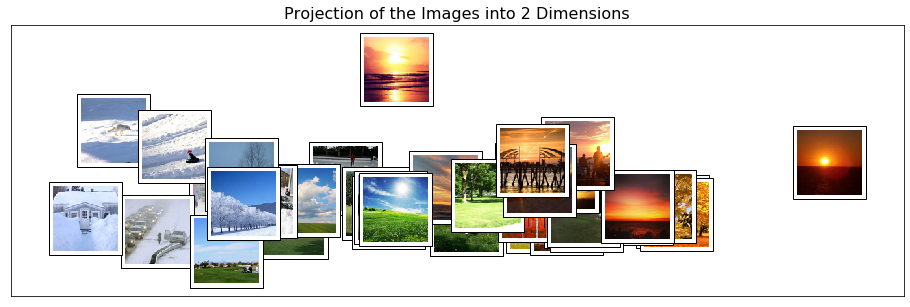

In [229]:
plot_image_space(images, transX)

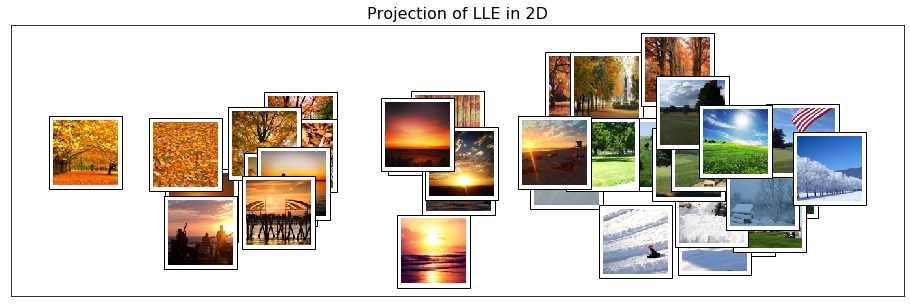

In [230]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard')
X_lle = embedding.fit_transform(X)

plot_image_space(images, X_lle,'Projection of LLE in 2D')

**2.Given this output, What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?**

**Looking at the output, We can conclude that the images closer to each other have similiar RGB Values or similar colour scheme. 
We can actually see that images of same season are next to each other or closer.
Images which have different colour scheme are far apart and hence they are of different season.**

**3. Once you completed the first two parts of the assignment, choose one of the following below:**
1. Repeat this process while using a different set of images curated by yourself.
2. Repeat this process using a different data reduction method and describe any sim- ilarities/differences between that experiment when compared to applying PCA.

In [231]:
img_dir = os.path.join(os.getcwd(), "images_NEW") # directory path
images = load_images(img_dir) # load images in the specified directory

In [232]:
X = pd.DataFrame([im.histogram() for im in images])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,197,330,408,305,321,249,210,163,142,101,...,38,32,35,34,34,29,20,30,13,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,242,194,134,144,117,111,87,85,81,88,...,1,0,0,0,0,0,0,0,0,0
4,1,3,2,1,1,3,8,11,14,11,...,16,26,17,46,40,50,151,367,349,643


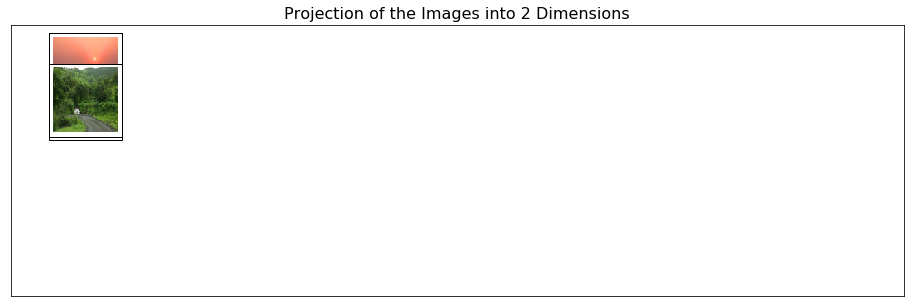

In [233]:
plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

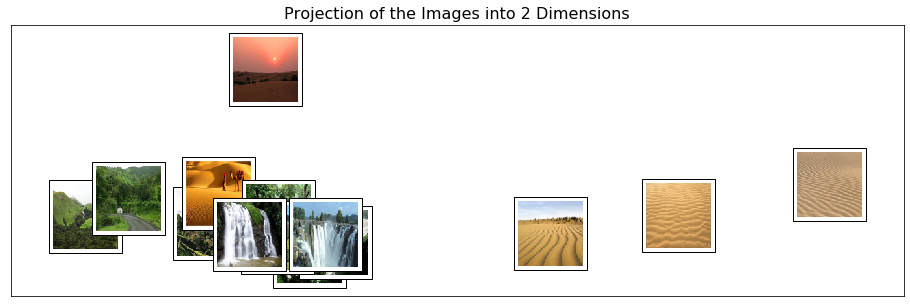

In [234]:
pca = PCA(n_components=2)
transX = pca.fit_transform(X)
plot_image_space(images, transX)

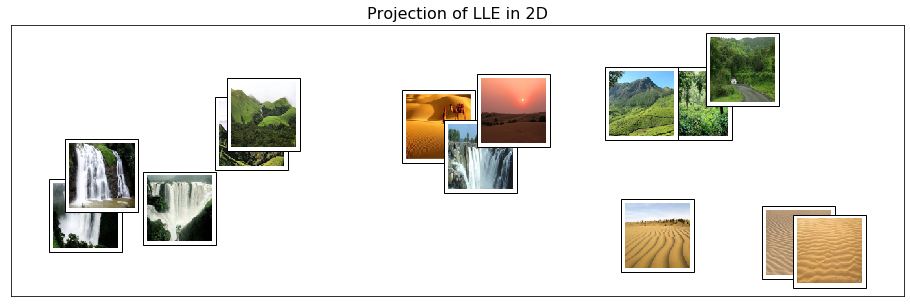

In [235]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors=6, n_components=2, method='standard')
X_lle = embedding.fit_transform(X)

plot_image_space(images, X_lle,'Projection of LLE in 2D')

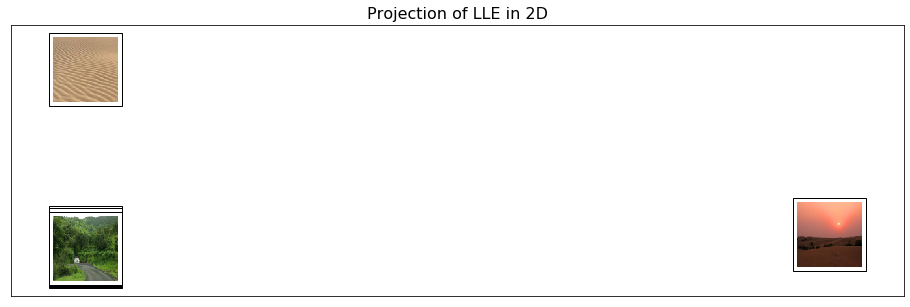

In [236]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors=6, n_components=2, method='hessian')
X_lle = embedding.fit_transform(X)

plot_image_space(images, X_lle,'Projection of LLE in 2D')